# test notebook
## implementation of basic MLP neural network
firstly we import some libraries and define basic activation functions

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

import matplotlib.pyplot as plt


specify the number of layers, number of neurons in each layer, and the activation function for each layer.

In [9]:
# example definition of a neural network
layers = [
    {'input_dim': 10, 'output_dim': 5, 'activation': 'relu'},
    {'input_dim': 5, 'output_dim': 2, 'activation': 'relu'},
    {'input_dim': 2, 'output_dim': 1, 'activation': 'sigmoid'}
]


def random_init(layers, X, seed = 44):
    np.random.seed(seed)
    if X.ndim == 1:
        x_size = 1
    else:
        x_size = X.shape[1]

    weights = []
    biases = []
    for i, layer in enumerate(layers):
        # intelligent guessing the input and output dimentions of the front and back layers
        if layer.get("input_dim") is None:
            if i == 0:
                layer['input_dim'] = x_size
            else:
                layer['input_dim'] = layers[i-1]['output_dim']
        if layer.get("output_dim") is None and i == len(layers) - 1:
            layer['output_dim'] = 1

        layer_input_dim = layer['input_dim']
        layer_output_dim = layer['output_dim']

        weight_matrix = np.random.randn(layer_output_dim, layer_input_dim)
        bias_matrix = np.matrix(np.random.randn(layer_output_dim, 1))
        
        weights.append(weight_matrix)
        biases.append(bias_matrix)

    return weights, biases

In [10]:
def forward_pass_single_layer(input, weights, bias, activation="sigmoid"):
    z = np.dot(weights, input) + bias
    if activation == "sigmoid":
        return sigmoid(z)
    elif activation == "relu":
        return relu(z)
    elif activation == "linear":
        return z
    else:
        raise ValueError("Activation function not supported")

In [11]:
def full_forward_pass(input, weights, biases, layers):
    current_input = input

    for i, layer in enumerate(layers):
        
        current_weights = weights[i]
        current_biases = biases[i]
        current_activation = layer['activation']
        current_input = forward_pass_single_layer(current_input, current_weights, current_biases, current_activation)
    return current_input

In [12]:
def loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

load the desired datasets.

In [13]:
os.getcwd()

'd:\\studia\\sem6\\miowad\\miowad\\NN\\NN1'

In [14]:

data_dir = Path("../data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_large_train = pd.read_csv(data_dir / "regression" / "steps-large-training.csv", index_col=0)
steps_large_test = pd.read_csv(data_dir / "regression" / "steps-large-test.csv", index_col=0)

In [15]:
weights, biases = random_init(layers, square_simple_train)

          x           y
1 -0.171543 -127.351580
2  0.025201 -129.942844
3 -1.368991   38.672367
4  1.907390  197.432191
5  0.011129 -129.988852


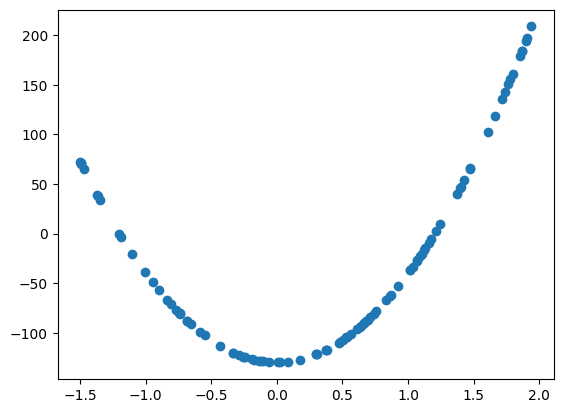

In [16]:
print(square_simple_train.head())
# plot the data
plt.scatter(square_simple_train.x, square_simple_train.y)

In [17]:
square_simple_layers = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'activation': 'linear'}    
]
weights, biases = random_init(square_simple_layers, square_simple_train['x'])


test if our functions work properly.

In [18]:
forward_pass_single_layer(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T
, weights[0], biases[0])

NameError: name 'sigmoid' is not defined

here I tried specyfing some parameters for the neural network by hand, but the results were not satisfying.

In [869]:
weights[0] = np.array([[3, -4, 1, 0, 0]]).reshape(5, 1)
weights[1] = np.array([[500, 400, 2, 0, 0]]).reshape(1, 5)

biases[0] = np.array([-5, -6, 0, 0, 0]).reshape(5, 1)
biases[1] = np.array([-130]).reshape(1, 1)

In [7]:
square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T

NameError: name 'square_simple_train' is not defined

MSE of training data:  11.366955569322622


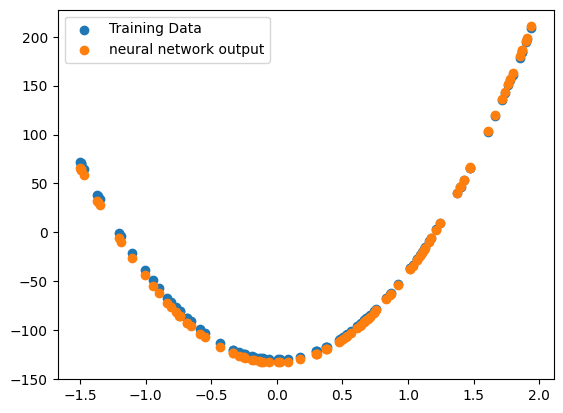

In [870]:
output = full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)
mse = np.mean((np.array(output) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

I want to have a better control over all of the network parameters, so I will try to plot outputs of the hidden layer.

MSE of training data:  0.0024887607895403676


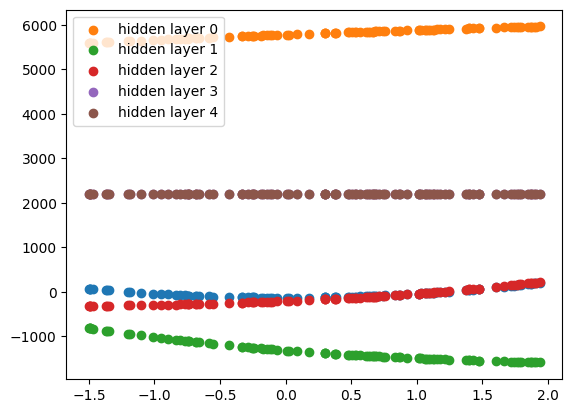

In [830]:
weights[0] = np.array([[2.4, -3, 1, 0, 0]]).reshape(5, 1)
weights[1] = np.array([[490, 450, 2, 0, 0]]).reshape(1, 5)

biases[0] = np.array([-4, -4.4, 0, 0, 0]).reshape(5, 1)
biases[1] = np.array([-130]).reshape(1, 1)



hidden_layer_outputs = forward_pass_single_layer(square_simple_train['x'].to_numpy().reshape(-1, 1).T, weights[0], biases[0], 'sigmoid')
hidden_layer_scaled_outputs = hidden_layer_outputs * weights[1].T + biases[1]

# plot the data
plt.scatter(square_simple_train.x, square_simple_train.y)
# plot all of the five columns from hidden_layer_scaled_outputs
for i in range(5):
    plt.scatter(square_simple_train.x, hidden_layer_scaled_outputs[i], label=f'hidden layer {i}')
plt.legend()

output = full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)
mse = np.mean((np.array(output) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)


as it is visible we want to fit two neurons as the output of the hidden layer. We will calculate the exact values we would need to fit the output of the hidden layer to the desired values.

In [875]:
optimized_params

array([ 2.19841722e-01,  6.53237448e-01, -7.47084467e-01,  4.16916181e+03,
       -3.89949500e+03, -2.57266760e+03,  1.81478454e+00,  2.19732638e+00,
        2.64499343e+00,  2.19650165e+03])

MSE of training data:  1.1860115391971726


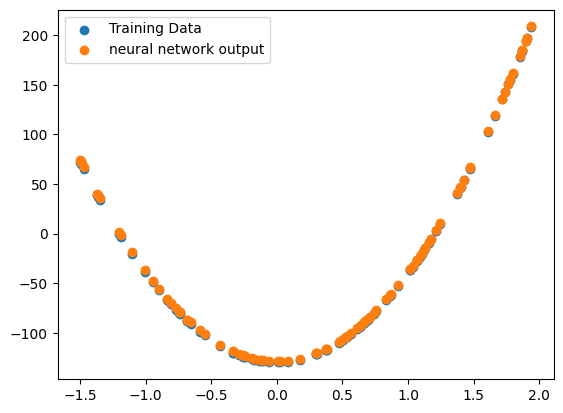

In [878]:
weights[0] = np.array([[0.219, 0.653, -0.747, 0, 0]]).reshape(5, 1)
weights[1] = np.array([[4169, -3899, -2572, 0, 0]]).reshape(1, 5)

biases[0] = np.array([1.815, 2.197, 2.645, 0, 0]).reshape(5, 1)
biases[1] = np.array([2196.5]).reshape(1, 1)

output = full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)
mse = np.mean((np.array(output) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

In [879]:
mse_test = np.mean((np.array(full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)) - np.array(square_simple_test.iloc[:, 1]))**2)
print("MSE of test data: ", mse_test)

MSE of test data:  1.3761319515785302


In [509]:
square_simple_train['x'][abs(square_simple_train['x']) < 0.05] # ustalamy jaka jest wartość przybliżona dla x=0
square_simple_train['y'][abs(square_simple_train['x']) < 0.05] # ustalamy jaka jest wartość przybliżona dla x=0

2   -129.942844
5   -129.988852
Name: y, dtype: float64

In [510]:
test_output = full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)
test_mse = np.mean((np.array(test_output) - np.array(square_simple_test.iloc[:, 1]))**2)
test_mse

512.8120260139337

MSE of training data:  1.1860115391971726


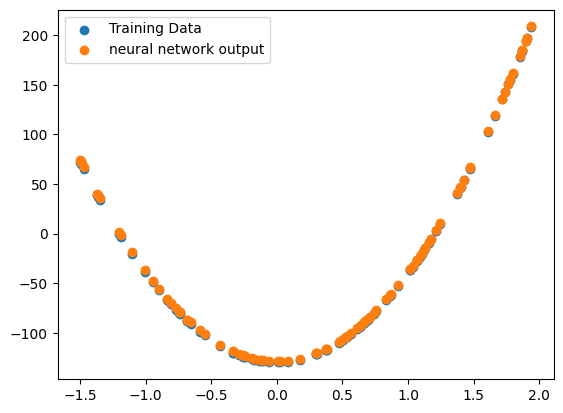

In [880]:
square_second_layers = [
    {'output_dim': 10, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

weights[0] = np.array([[0.219, 0.653, -0.747, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1)
weights[1] = np.array([[4169, -3899, -2572, 0, 0, 0, 0, 0, 0, 0]]).reshape(1, 10)

biases[0] = np.array([1.815, 2.197, 2.645, 0, 0, 0,0,0,0,0]).reshape(10, 1)
biases[1] = np.array([2196.5]).reshape(1, 1)

output = full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)
mse = np.mean((np.array(output) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

In [882]:
test_mse = np.mean((np.array(full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_simple_layers)) - np.array(square_simple_test.iloc[:, 1]))**2)
test_mse

1.3761319515785302

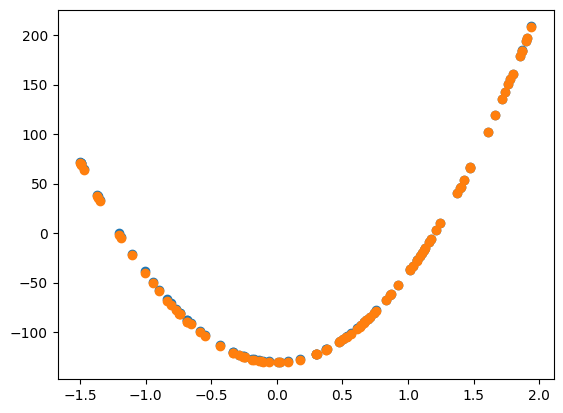

In [937]:
square_third_layers = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

weights = [np.array([[0.54, -1830, -0.5, 0, 0]]).reshape(5, 1), np.array([[1, 0, 0,0,0], [0, 1, 0,0,0], [0, 0, 1,0,0], [0,0,0,0,0], [0,0,0,0,0]]).reshape(5,5), np.array([[-19118, 0.165, -23302,0,0]]).reshape(1, 5)]
biases = [np.array([[2.1, -2898, 2.24, 0, 0]]).reshape(5, 1), np.array([[0, 0, 0, 0, 0]]).reshape(5, 1), np.array([[30010]]).reshape(1, 1)]


results = full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_third_layers)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], results.flatten(), label='neural network output')


In [936]:
mse_test = np.mean((np.array(full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, square_third_layers)) - np.array(square_simple_test.iloc[:, 1]))**2)
mse_test

0.8442456149919451

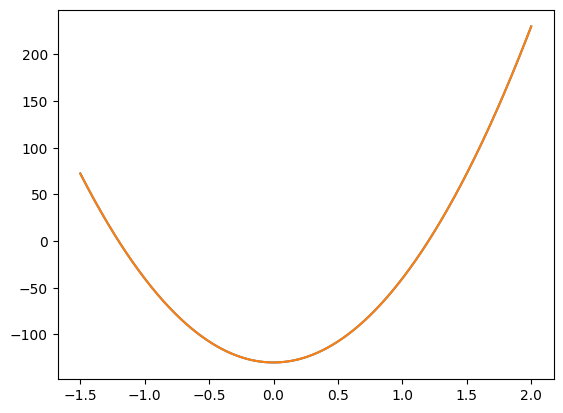

In [908]:
from scipy.optimize import minimize


def function(params, x):
    m = 3
    s = 0
    params = [params[i:i+m] for i in range(0, len(params), m)]
    for i in range(3):
        s += params[2][i] * sigmoid( sigmoid(params[0][i]*x + params[1][i])  )
    return s + params[3][0]

def objective(params, x, y):
    return np.mean((function(params, x) - y)**2)

def target(x):
    return 90*x**2 -130

x = np.linspace(-1.5, 2, 100000)
y = target(x)

init_params = np.random.randn(10)
result = minimize(objective, init_params, args=(x, y))
optimized_params = result.x

plt.plot(x, y, label='target')
plt.plot(x, function(optimized_params, x), label='optimized')

## steps dataset

          x   y
1 -1.481354 -80
2  1.033264  80
3 -0.076403   0
4 -1.419785 -80
5 -0.108398   0


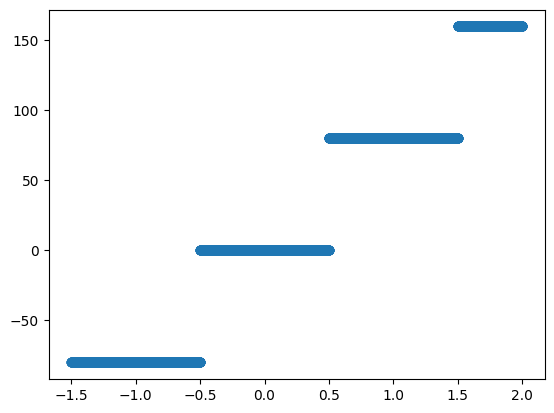

In [512]:
print(steps_large_train.head())
# plot the data
plt.scatter(steps_large_train.x, steps_large_train.y)

we want to fit the data in a way, such that the most steeps parts of the sigmoid functions are between the steps.


In [513]:
steps_simple_layers = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'activation': 'linear'}    
]

weights = [np.array([[1, 0, 0, 0, 0]]).reshape(5, 1), np.array([[1, 1, 1, 1, 1]]).reshape(1, 5)]
biases = [np.array([[1, 0, 0, 0, 0]]).reshape(5, 1), np.array([[1]]).reshape(1, 1)]

MSE of training data:  7193.204590217444


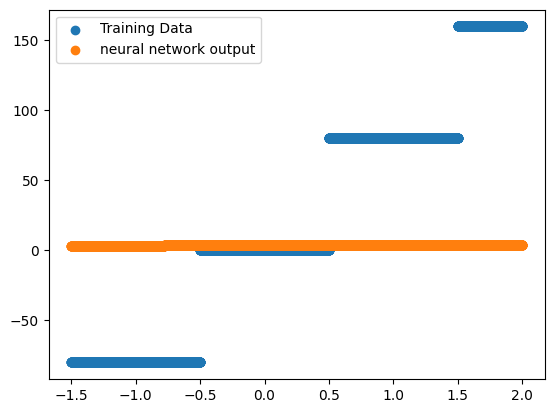

In [514]:
output = full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_simple_layers)
mse = np.mean((np.array(output) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

MSE of training data:  2.090984203763538


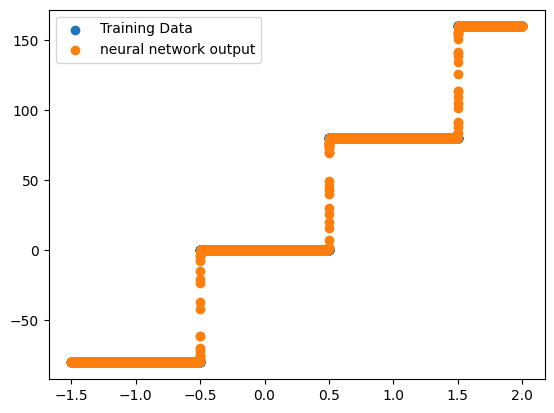

In [515]:

weights = [np.array([[1000, 1000, 1000, 0, 0]]).reshape(5, 1), np.array([[80, 80, 80, 0, 0]]).reshape(1, 5)]
biases = [np.array([[500, -500, -1500, 0, 0]]).reshape(5, 1), np.array([[-80]]).reshape(1, 1)]

output = full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_simple_layers)
mse = np.mean((np.array(output) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

it looks quite well, now let's try to check the performance on the test dataset.

In [516]:
mse_test = np.mean((np.array(full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_simple_layers)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

2.755916962688831

very good performance. The same thing can be done for more number of neurons in the hidden layer, since we can make their weights equal to zero, it will be very similar.

MSE of training data:  2.090984203763538


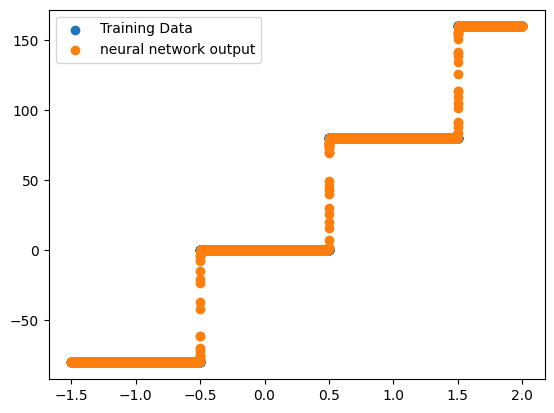

In [522]:
steps_second_layer = [
    {'output_dim': 10, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

weights = [np.array([[1000, 1000, 1000, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1), np.array([[80, 80, 80, 0, 0, 0, 0, 0, 0, 0]]).reshape(1, 10)]
biases = [np.array([[500, -500, -1500, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1), np.array([[-80]]).reshape(1, 1)]

output = full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_second_layer)
mse = np.mean((np.array(output) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], output.flatten(), label='neural network output')
plt.legend()
plt.show()

In [523]:
mse_test = np.mean((np.array(full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_second_layer)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

2.755916962688831

and now the same thing but with two layers.

In [640]:
steps_third_layer = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 1, 'activation': 'linear'}
]

weights, biases = random_init(steps_third_layer, steps_large_train["x"])
weights = [10*w for w in weights]

In [641]:
weights

[array([[-7.50614717],
        [13.16357325],
        [12.46140029]]),
 array([[ 18.58783692,   0.87587976,  -0.52322196],
        [  5.55471637,  -9.63403694,  -1.80321465],
        [-11.83409156,   6.05445921,  -9.51650553]]),
 array([[  8.25664851, -12.09813552, -11.90503616]])]

MSE of training data:  0.5982612568644722


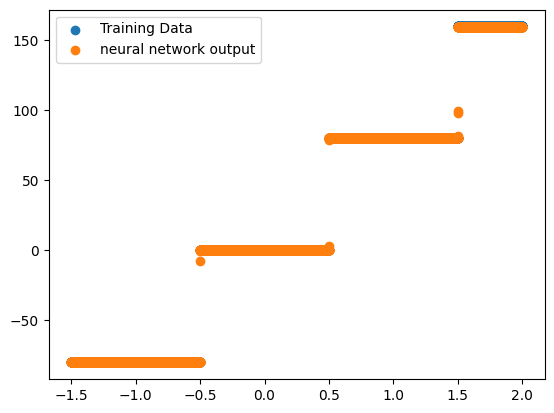

In [749]:

weights = [np.array([[10000, 10000, 10000, 0, 0]]).reshape(5, 1), np.array([[10, 0, 0,0,0], [0, 10, 0,0,0], [0, 0, 10,0,0], [0,0,0,0,0], [0,0,0,0,0]]).reshape(5,5), np.array([[160, 160, 160,0,0]]).reshape(1, 5)]
biases = [np.array([[5000, -5000, -15000, 0, 0]]).reshape(5, 1), np.array([[0, 0, 0, 0, 0]]).reshape(5, 1), np.array([[-320]]).reshape(1, 1)]

output = full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T, 10*weights, biases, steps_third_layer)
mse = np.mean((np.array(output) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0],  np.array(output), label='neural network output')
plt.legend()
plt.show()

In [750]:
mse_test = np.mean((np.array(full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T, weights, biases, steps_third_layer)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

0.5776671585750651

In [586]:
biases

[matrix([[-1.71507046],
         [ 1.85878369],
         [ 0.08758798],
         [-0.0523222 ],
         [ 0.55547164]]),
 matrix([[ 0.19564003],
         [-0.51411218],
         [-3.07368882],
         [-0.39515907],
         [-0.79539918]]),
 matrix([[-0.23533384]])]